In [1]:
# Question 4: Introduction to DBSCAN Clustering for Anomaly Detection
# Description: Apply DBSCAN on a dataset to identify core samples and anomalies.

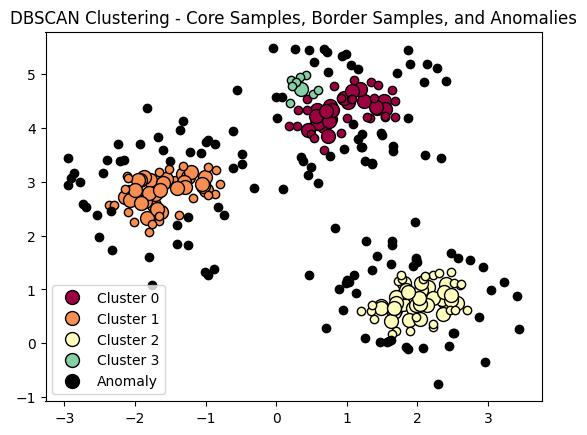

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

# Step 1: Generate synthetic dataset
X, labels_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

# Step 2: Apply DBSCAN
# eps: maximum distance between two samples for one to be considered as in the neighborhood of the other
# min_samples: minimum number of points required to form a dense region
db = DBSCAN(eps=0.3, min_samples=10).fit(X)

# Step 3: Extract labels and core sample indices
labels = db.labels_

# Identify core samples
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Identify unique clusters (labels), including -1 for noise (anomalies)
unique_labels = set(labels)

# Step 4: Plotting
# Set up colors for clusters and noise
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

# Plot each cluster
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black color for noise (anomalies)
        col = [0, 0, 0, 1]

    # Mask for current label
    class_member_mask = (labels == k)

    # Core samples
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=10, label=f'Cluster {k}' if k != -1 else 'Anomaly')

    # Border samples
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

# Final plot settings
plt.title('DBSCAN Clustering - Core Samples, Border Samples, and Anomalies')
plt.legend()
plt.show()
